# Digital Image Processing<br> Problem 1<br> Felix Neutatz

##Histogram Equalization

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
def draw_histogram(greyvalues, cdf, numberBits = 8, normed = False):
    valueRange = 2**numberBits  
    
    #plot histogram        
    fig, ax1 = plt.subplots()   
    
    if (normed):
        ax1.set_title("normed histogram")
    else:
        ax1.set_title("histogram")
    
    index = np.arange(valueRange)
    
    if (normed):
        ax1.bar(index, greyvalues  / float(np.sum(greyvalues)), 0.35, alpha=0.4, color='b')
    else:
        ax1.bar(index, greyvalues, 0.35, alpha=0.4, color='b')
    ax1.set_ylabel('count', color='b')
    ax1.set_xlabel('pixel intensities')
    ax1.set_xlim((0,valueRange))    
    for tl in ax1.get_yticklabels():
        tl.set_color('b')
        
    #plot cdf
    ax2 = ax1.twinx()    
    if (normed):
        ax2.plot(index, cdf / float(np.sum(greyvalues)), color = 'r') 
        ax2.set_ylim((0,1.1))
    else:
        ax2.plot(index, cdf, color = 'r')     
    ax2.set_ylabel('cdf', color = 'r')
    ax2.set_xlim((0,valueRange))
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

    plt.show()    

In [4]:
#my implementation of histogram
def histogram(image, numberBits = 8):
    values = np.asmatrix(image,dtype=int).A1
        
    valueRange = 2**numberBits  
    index = np.arange(valueRange)
    
    greyvalues = np.asarray([0]*valueRange, dtype = float)
    
    for i in range(len(values)):
        greyvalues[values[i]] += 1
    
    #calculate CDF
    sum = 0.0
    cdf = np.asarray([0.0] * valueRange, dtype = float)
    for i in index:
        cdf[i] = sum + greyvalues[i]
        sum += greyvalues[i]
        
    return (greyvalues, cdf)

In [5]:
#own implementation of histogram
def histogram_equalization(image, normed = False, verbose = True):
    
    #TODO: generalize that also for images other than 8 bit pictures
    numberBits = 8    
    valueRange = 2**numberBits
    index = np.arange(valueRange)
    
    #calculate histogram of original picture
    (greyvalues, cdf) = histogram(image, numberBits = numberBits)
            
    #calculate transformation function  
    transformation = np.asarray((cdf / float(image.shape[0] * image.shape[1])) * (valueRange - 1), dtype=int)
    
    #transform original image
    transformedImage = transformation[image]
    
    #calculate histogram of transformed image
    (greyvalues_new, cdf_new) = histogram(transformedImage, numberBits = numberBits)
    
    #plot fancy pictures   
    if (verbose):
        #plot original picture
        imgplot = plt.imshow(image, cmap='Greys_r')
        plt.title("original image")
        plt.show()

        #draw histogram of original picture
        draw_histogram(greyvalues, cdf, numberBits = numberBits, normed = normed)

        #plot transformation function
        plt.plot(index, transformation, color = 'r')  
        plt.xlim((0,valueRange)) 
        plt.ylim((0,valueRange + 0.1 * valueRange)) 
        plt.xlabel("original pixel intensity")
        plt.ylabel("new pixel intensity")
        plt.title("transformation function")
        plt.show()

        #plot transformed picture
        imgplot = plt.imshow(transformedImage, cmap='Greys_r')
        plt.title("transformed image")
        plt.show()

        #draw histogram
        draw_histogram(greyvalues_new, cdf_new, numberBits = numberBits, normed = normed)
    
    return (greyvalues, cdf, transformation, transformedImage, greyvalues_new, cdf_new)   

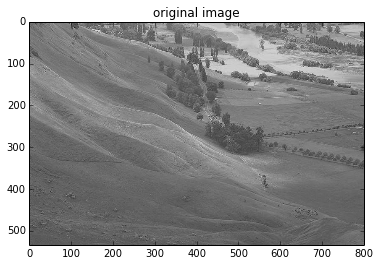

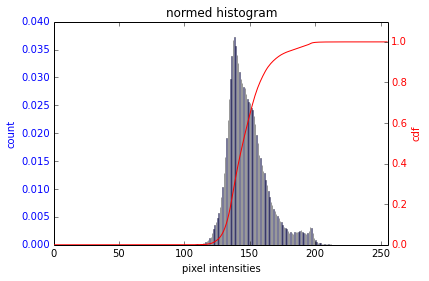

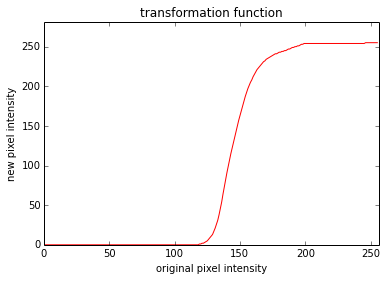

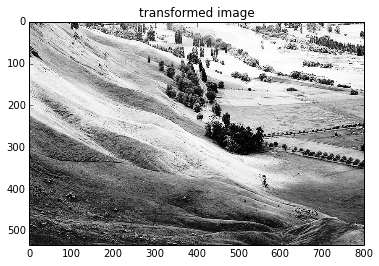

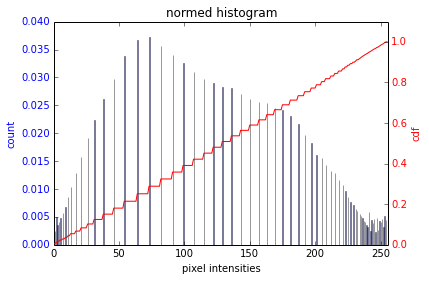

In [6]:
imageName = 'wikipedia1.jpg'
im=mpimg.imread(imageName)
histogram_equalization(im, normed = True);

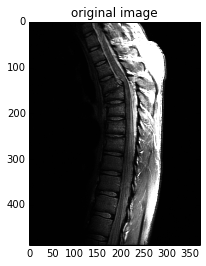

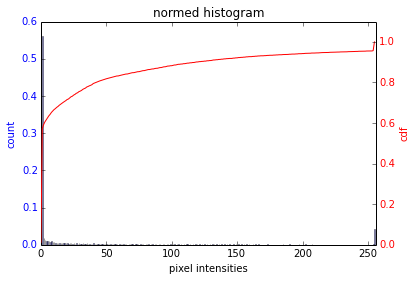

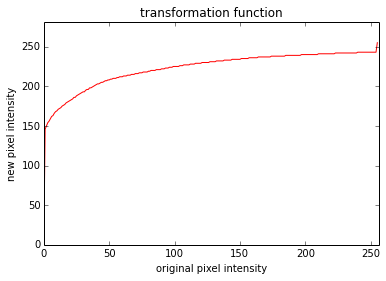

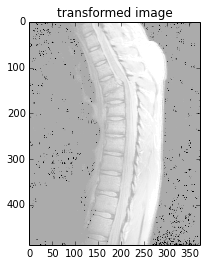

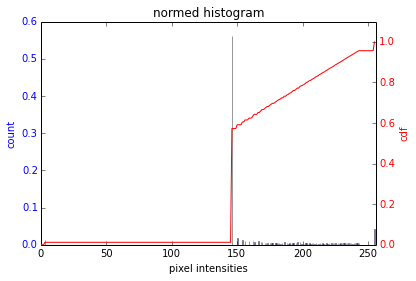

In [7]:
imageName = 'Fig1.jpg'
im=mpimg.imread(imageName)
histogram_equalization(im, normed = True);

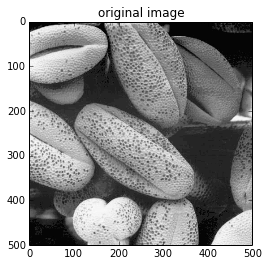

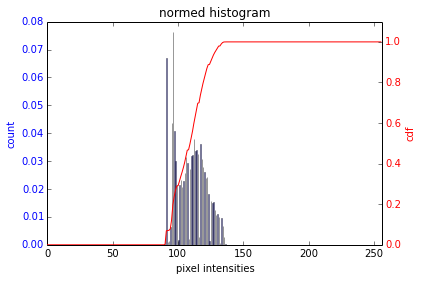

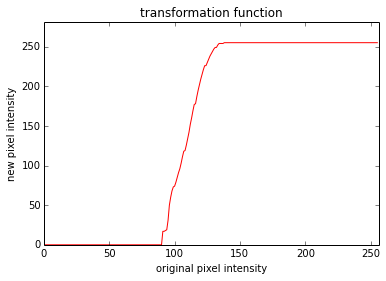

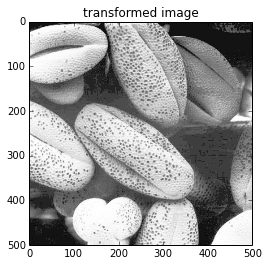

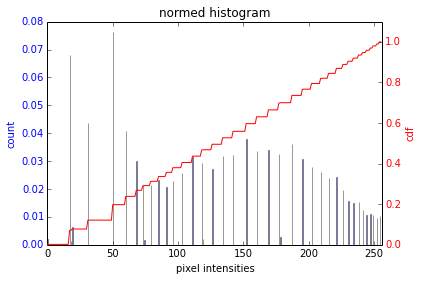

In [8]:
imageName = 'Fig2.jpg'
im=mpimg.imread(imageName)
histogram_equalization(im, normed = True);